<a href="https://colab.research.google.com/github/adithyajalluri2005/DataScienceEcosystem/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow

In [41]:
import tensorflow as tf

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
X=df.iloc[:,3:-1]
y=df.iloc[:,-1]
X,y

(      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
 0             619    France  Female   42       2       0.00              1   
 1             608     Spain  Female   41       1   83807.86              1   
 2             502    France  Female   42       8  159660.80              3   
 3             699    France  Female   39       1       0.00              2   
 4             850     Spain  Female   43       2  125510.82              1   
 ...           ...       ...     ...  ...     ...        ...            ...   
 9995          771    France    Male   39       5       0.00              2   
 9996          516    France    Male   35      10   57369.61              1   
 9997          709    France  Female   36       7       0.00              1   
 9998          772   Germany    Male   42       3   75075.31              2   
 9999          792    France  Female   28       4  130142.79              1   
 
       HasCrCard  IsActiveMember  EstimatedSalary 

In [45]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [46]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [47]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [48]:
X=X.drop(['Geography','Gender'],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [49]:
X=pd.concat([X,geography,gender],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [52]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [54]:
classifier=Sequential()


In [55]:
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))

In [56]:
classifier.add(Dense(1,activation='sigmoid'))


In [61]:
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [62]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [63]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 4s 5ms/step - loss: 0.3231 - accuracy: 0.8664 - val_loss: 0.3642 - val_accuracy: 0.8561
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3238 - accuracy: 0.8651 - val_loss: 0.3653 - val_accuracy: 0.8535
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3222 - accuracy: 0.8703 - val_loss: 0.3661 - val_accuracy: 0.8531
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3227 - accuracy: 0.8688 - val_loss: 0.3659 - val_accuracy: 0.8542
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3232 - accuracy: 0.8662 - val_loss: 0.3684 - val_accuracy: 0.8485
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3226 - accuracy: 0.8679 - val_loss: 0.3684 - val_accuracy: 0.8497
Epoch 7/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3216 - accuracy: 0.8684 - val_loss: 0.3699 - val_accuracy:

In [65]:
model_history.history.values()

dict_values([[0.3231297731399536, 0.32378891110420227, 0.3222171366214752, 0.32272008061408997, 0.3232487142086029, 0.32255929708480835, 0.3216392993927002, 0.32200294733047485, 0.3222508430480957, 0.3210700452327728, 0.32133907079696655, 0.32120564579963684, 0.320785254240036, 0.3209250271320343, 0.32039719820022583, 0.31942251324653625, 0.31873443722724915, 0.319045752286911, 0.31847745180130005, 0.31922173500061035, 0.31893518567085266], [0.866392970085144, 0.8650867938995361, 0.8703116178512573, 0.8688188195228577, 0.8662064075469971, 0.8678858280181885, 0.868445634841919, 0.868445634841919, 0.867512583732605, 0.8678858280181885, 0.8690053820610046, 0.8671393990516663, 0.868445634841919, 0.8697518110275269, 0.8695651888847351, 0.8699384331703186, 0.8691920042037964, 0.8710580468177795, 0.8695651888847351, 0.8708714246749878, 0.8712446093559265], [0.3641704320907593, 0.36528101563453674, 0.3661477863788605, 0.36589059233665466, 0.3684368133544922, 0.3683701753616333, 0.3698907792568

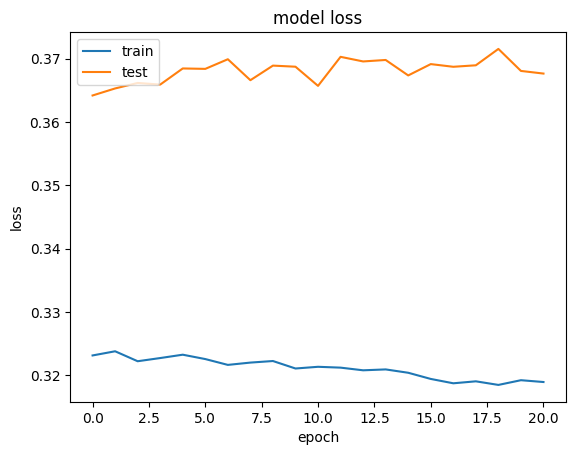

In [68]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 3ms/step


In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1474,  121],
       [ 173,  232]])

In [72]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.853

In [74]:
classifier.get_weights()

[array([[ 0.256626  , -0.34410077, -0.1695312 , -0.00603889, -0.09900659,
         -0.5312303 ,  0.17490461,  0.11429191, -0.3115771 ,  0.40829125,
         -0.19535777],
        [ 0.24611148, -0.5352047 , -1.0787911 ,  0.20338893,  0.00753368,
          1.1554275 ,  0.22086893,  0.2286616 ,  0.18625063, -0.76444054,
          0.65192485],
        [ 0.11255378, -0.46076295, -0.14411406, -0.15126666,  0.0283504 ,
         -0.23161809,  0.3808379 ,  0.19086081, -0.3348907 ,  0.057469  ,
         -0.24006596],
        [ 0.10705674,  0.51914823, -0.43149358,  0.11206667, -0.39882007,
         -0.10849521,  0.10574377, -0.88753194, -0.24868976,  0.23191914,
          0.26991826],
        [-0.9860658 , -0.22343644,  0.69373333,  1.0197012 , -1.1413672 ,
          0.88844013,  0.79002917, -0.28386247, -1.1494068 ,  0.1549442 ,
         -0.594953  ],
        [-0.36441338, -0.1142974 ,  0.26638764,  0.10378823,  0.02195063,
         -0.28073746, -0.02268596,  0.13053496,  0.24486868, -0.3423261